In [82]:
#Import necessary libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [83]:
car=pd.read_csv(r'C:\Users\Khushi Bakshi\Downloads\archive (3).zip')

In [84]:
car.head()

,Name,Founder,Company.Type,Headquaters,Producta,Founded,Industry,Production.Output,Revenue,Operating.Income,Net.Income,Total.Assets,Total.Equity,Number.of.Employees
0,VinFast Auto Ltd.,Pham Nhat Vuong,Public,Worldwide,Pham Nhat Vuong,June 2017; 6 years ago (2017-06),Automotive,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Truong Hai Group Corporation,Trần Bá Dương,Joint stock company,NaN,Trần Bá Dương,"April 29, 1997; 26 years ago (1997-04-29) in B...",Automotive industry,NaN,NaN,NaN,NaN,NaN,NaN,"60,000[1]"
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,UzAuto Motors,People,Joint venture,NaN,NaN,March 2008; 15 years ago (2008-03),Automotive,327 thousand vehicles (2022),NaN,NaN,NaN,NaN,NaN,"16,000 (August, 2023)"
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
# Drop rows with all NaN values
car_cleaned = car.dropna(how='all')

# Extract relevant information from the 'Founded' column
car_cleaned['Founded'] = pd.to_datetime(car_cleaned['Founded'], errors='coerce')
car_cleaned['Founded_Year'] = car_cleaned['Founded'].dt.year
car_cleaned.drop(['Founded'], axis=1, inplace=True)

# Display basic information about the cleaned dataset
car_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 475 entries, 0 to 652
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 430 non-null    object 
 1   Founder              145 non-null    object 
 2   Company.Type         404 non-null    object 
 3   Headquaters          164 non-null    object 
 4   Producta             310 non-null    object 
 5   Industry             361 non-null    object 
 6   Production.Output    53 non-null     object 
 7   Revenue              30 non-null     object 
 8   Operating.Income     25 non-null     object 
 9   Net.Income           32 non-null     object 
 10  Total.Assets         24 non-null     object 
 11  Total.Equity         26 non-null     object 
 12  Number.of.Employees  148 non-null    object 
 13  Founded_Year         155 non-null    float64
dtypes: float64(1), object(13)
memory usage: 55.7+ KB


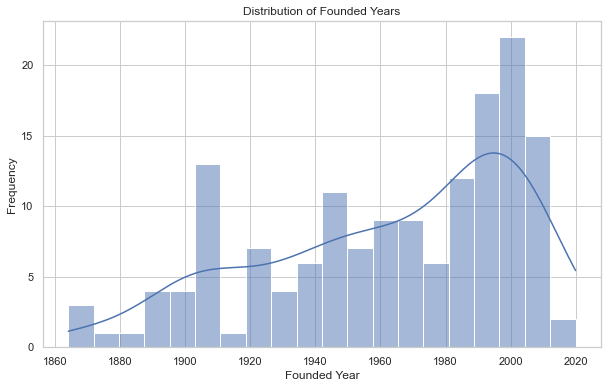

In [86]:
# Distribution of the 'Founded_Year' column
plt.figure(figsize=(10, 6))
sns.histplot(car_cleaned['Founded_Year'].dropna().astype(int), bins=20, kde=True)
plt.title('Distribution of Founded Years')
plt.xlabel('Founded Year')
plt.ylabel('Frequency')
plt.show()

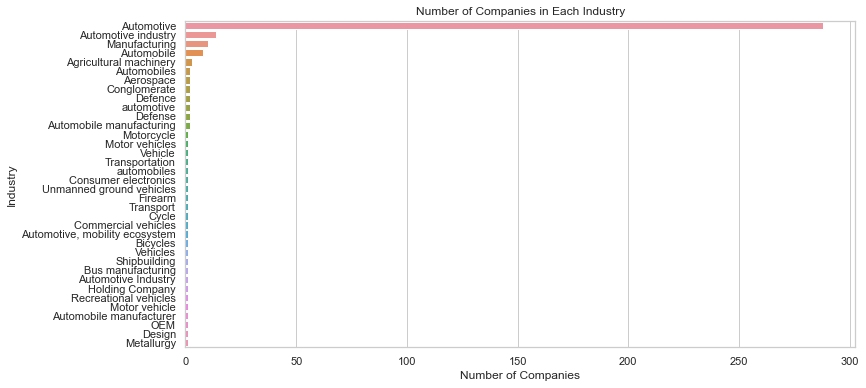

In [87]:
# Number of companies in each industry
plt.figure(figsize=(12, 6))
sns.countplot(y='Industry', data=car_cleaned, order=car_cleaned['Industry'].value_counts().index)
plt.title('Number of Companies in Each Industry')
plt.xlabel('Number of Companies')
plt.ylabel('Industry')
plt.show()

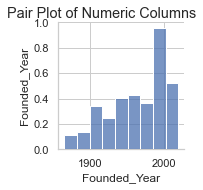

In [88]:
# Pair plot for numeric columns
numeric_columns = car_cleaned.select_dtypes(include='number')
sns.pairplot(numeric_columns)
plt.suptitle('Pair Plot of Numeric Columns', y=1.02)
plt.show()